# K-Fold

Bu proje de Kentsel Arazi Örtüsü veri seti kullanılmıştır. Veri seti https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover sitesi üzerinden yayınlanmıştır. Bu veri setinde 168 kayıt bulunmaktadır. Veri seti içerisinde 148 çeşit çeşit sınıf
bulunmaktadır. Yüksek çözünürlüklü bir hava görüntüsünü 9 tür kentsel arazi örtüsüne sınıflandırmak için eğitim ve test verilerini içermektedir. Sınıflandırma için çok ölçekli spektral, boyut, şekil ve doku bilgileri kullanmaktadır. Her sınıf için az sayıda eğitim örneği (14-30) ve çok sayıda sınıflandırma değişkeni (148) bulunmaktadır. Fature sütunlarımız olarak belirlenmiştir ve 148 feature'ımız vardır. 

k-fold cross validation, Makine Öğrenmesi modellerinin başarılarının değerlendirilmesi için kullanılan bir yöntem olarak bilinmektedir. Bu yöntemde veri seti eğitim ve test seti olarak ayrılmaktadır. Bu işlem için seçilen yöntem modelin başarısını önemli ölçüde etkilemektedir. Veri seti k eşit parçaya bölünmekte ve her seferinde test datası bir adım kayarak train edilmiş datanın aynı zamanda test içinde kullanılmasını sağlamaktır. 

Proje için 2 farklı model kullanılmıştır. Bu tarz problemlerde tek bir model ile doğru sonucun elde edilmesi mümkün değildir.
Bu nedenle en iyi sonucun elde edilmesi için model sayısının 1 olmaması önemlidir ve 2 model seçilerek proje gerçekleştirilmiştir. Bu modeller SVM ve Bayes'dir.

İlk olarak temel kütüphaneler olan numpy ve pandas import edilmiştir. Projemiz için model oluşturma kısımlarını kolaylaştıracak bütün gerekli kütüphaneleri içe aktarılması gerekmektedir. Modelleri kullanabilmek için sklearn kütüphanesi import edilmiştir. Şemaları ve grafikleri çizip sonuçları görselleştirmek için ise matplotlib kütüphanesini kullanılacaktır. Elimizdeki veriyi eğitim ve test aşaması olarak bölmemize yardımcı olması için sklearn modülünün fonksiyonlarını import edilmiştir. Encoding, Confusion matris ve diğer metrikler için de gerekli kütüphaneleri yüklenmiştir. 

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import re


from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from scikitplot.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

from PIL import Image



In [82]:
# Import train and test dataset
data_train = pd.read_csv("training.csv", header=None)
data_test = pd.read_csv("testing.csv", header=None)

data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
1,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2,0.5,0.85,6.29,1.67,0.7,-0.08,56,3806.36
2,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.2,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
3,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
4,concrete,2.42,399,1.28,230.4,2.49,2.73,204.6,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38


datasetinde karşılaştığız problem:
Kolon isimleri 1.satır olarak eklenmiştir. 1. satırdaki isimler çekilerek sütun isimleri olarak eklenmiştir. Bu işlemden sonra 1. satır silinmiştir.

In [83]:
data_test.iloc[0,:].values

array(['class', 'BrdIndx', 'Area', 'Round', 'Bright', 'Compact',
       'ShpIndx', 'Mean_G', 'Mean_R', 'Mean_NIR', 'SD_G', 'SD_R',
       'SD_NIR', 'LW', 'GLCM1', 'Rect', 'GLCM2', 'Dens', 'Assym', 'NDVI',
       'BordLngth', 'GLCM3', 'BrdIndx_40', 'Area_40', 'Round_40',
       'Bright_40', 'Compact_40', 'ShpIndx_40', 'Mean_G_40', 'Mean_R_40',
       'Mean_NIR_40', 'SD_G_40', 'SD_R_40', 'SD_NIR_40', 'LW_40',
       'GLCM1_40', 'Rect_40', 'GLCM2_40', 'Dens_40', 'Assym_40',
       'NDVI_40', 'BordLngth_40', 'GLCM3_40', 'BrdIndx_60', 'Area_60',
       'Round_60', 'Bright_60', 'Compact_60', 'ShpIndx_60', 'Mean_G_60',
       'Mean_R_60', 'Mean_NIR_60', 'SD_G_60', 'SD_R_60', 'SD_NIR_60',
       'LW_60', 'GLCM1_60', 'Rect_60', 'GLCM2_60', 'Dens_60', 'Assym_60',
       'NDVI_60', 'BordLngth_60', 'GLCM3_60', 'BrdIndx_80', 'Area_80',
       'Round_80', 'Bright_80', 'Compact_80', 'ShpIndx_80', 'Mean_G_80',
       'Mean_R_80', 'Mean_NIR_80', 'SD_G_80', 'SD_R_80', 'SD_NIR_80',
       'LW_80', 'GLCM1

In [84]:
names     = data_test.iloc[0,:].values
df_train  = pd.read_csv("training.csv",names = names)
df_test   = pd.read_csv("testing.csv", names = names)
data_train= df_train.drop([0])
data_test = df_test.drop([0])
data_test
data_train.head()



,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
1,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2,0.5,0.85,6.29,1.67,0.7,-0.08,56,3806.36
2,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.2,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
3,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
4,concrete,2.42,399,1.28,230.4,2.49,2.73,204.6,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
5,concrete,2.15,944,1.73,193.18,2.28,4.1,165.98,205.55,208,...,15.65,50.08,0.85,0.49,8.15,0.23,1,-0.08,6232,1146.38


0.index yukarıda açıkladığımız nedenden dolayı silindiğinden dolayı tekrardan 0 ile başlatılması için aşağıdaki işlem yapılmıştır.

In [85]:

set_index_train = data_train.index.values -1
set_index_test  = data_test.index.values -1


In [86]:
indexedDataTrain = data_train.set_index(pd.Index(set_index_train))
indexedDataTest = data_test.set_index(pd.Index(set_index_test))
indexedDataTrain

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2,0.5,0.85,6.29,1.67,0.7,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.2,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.4,2.49,2.73,204.6,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.1,165.98,205.55,208,...,15.65,50.08,0.85,0.49,8.15,0.23,1,-0.08,6232,1146.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,car,1.43,39,1.41,234.03,1.54,1.6,206.36,246.05,249.69,...,55.92,1.73,0.65,0.81,7.05,1.89,0.42,-0.1,66,2469.69
164,soil,1.92,141,1.24,215.19,2.02,2.02,212.28,216.28,217,...,18.91,3.49,0.88,0.67,7.88,1.44,0.82,0.06,990,824.01
165,grass,2.97,252,1.73,164.13,3.2,3.09,184.15,152.03,156.22,...,33.52,2.02,0.86,0.71,8.5,1.82,0.54,0.06,948,821.84
166,grass,1.57,216,1.27,164.84,1.71,1.97,192.55,148.34,153.62,...,24.49,1.13,0.76,0.85,7.75,2.11,0.3,0.09,254,1580.72


grass        29
building     25
concrete     23
tree         17
shadow       16
car          15
pool         15
asphalt      14
soil         14
Name: class, dtype: int64


C:\Users\Linda7lll\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


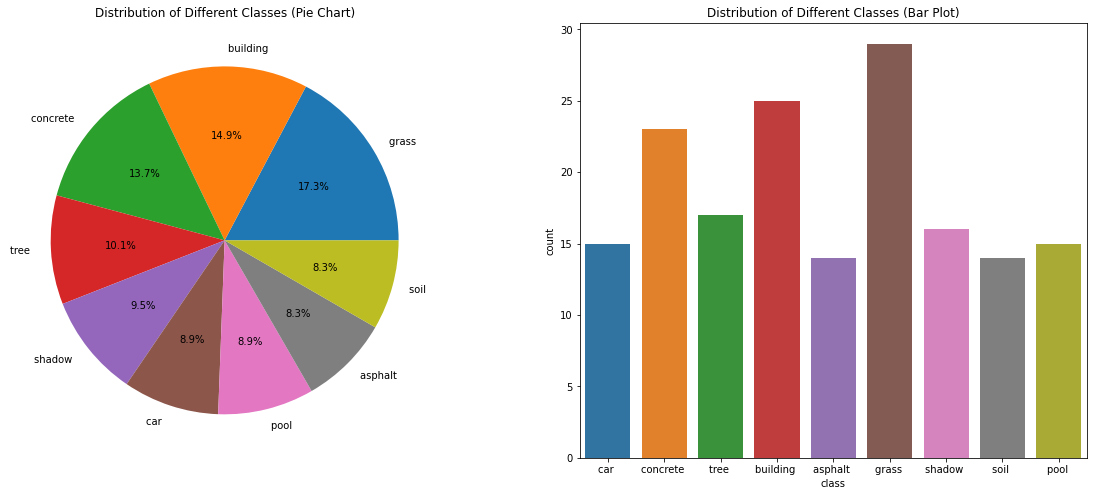

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

print(indexedDataTrain['class'].value_counts())

f,ax=plt.subplots(1,2,figsize=(20,8))
indexedDataTrain['class'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Distribution of Different Classes (Pie Chart)')
ax[0].set_ylabel('')
sns.countplot('class',data=indexedDataTrain,ax=ax[1])
ax[1].set_title('Distribution of Different Classes (Bar Plot)')
plt.show()

building     97
concrete     93
tree         89
grass        83
shadow       45
asphalt      45
car          21
soil         20
pool         14
Name: class, dtype: int64


C:\Users\Linda7lll\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


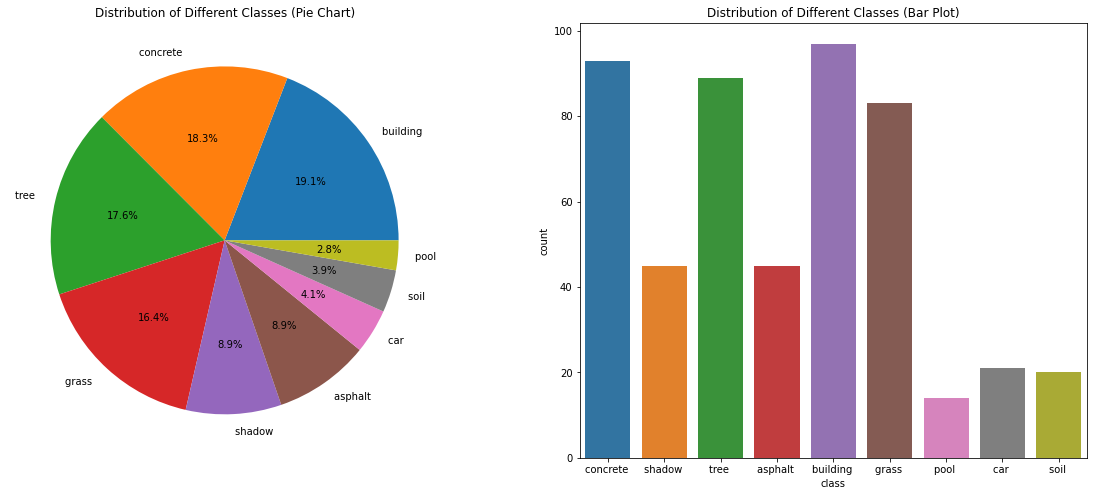

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

print(indexedDataTest['class'].value_counts())

f,ax=plt.subplots(1,2,figsize=(20,8))
indexedDataTest['class'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Distribution of Different Classes (Pie Chart)')
ax[0].set_ylabel('')
sns.countplot('class',data=indexedDataTest,ax=ax[1])
ax[1].set_title('Distribution of Different Classes (Bar Plot)')
plt.show()

In [90]:
indexedDataTrain.isnull().any().any()  #kontol

False

In [91]:
indexedDataTest.isnull().any().any()

False

In [92]:
#train datası, label, feature ayrımı (tüm feauturler kullanılmıştır.)

def import_data():
   
    x = indexedDataTrain.drop(['class'], axis=1)
    y = pd.DataFrame(indexedDataTrain['class'].values)

    return x, y

# SVM 

SVM, sınıflandırma veya regresyon problemleri için kullanılabilen denetimli bir makine öğrenmesi algoritmasıdır.Sıklıkla sınıflandırma problemlerinde kullanılmaktadır. Bu algoritmada, her bir datayı belirli bir koordinatın değeri olan her özelliğin değeri ile birlikte n-boyutlu değere bir nokta olarak çizilmektedir. Bu aşamadan sonra ise, iki sınıftan oldukça iyi ayrım yapan hiper-düzlemi bularak sınıflandırma gerçekleştirilir. C katsayısı sabit tutularak ve değeri 1 seçilerek eğitim gerçekleştiririlir. rbf, lineer ve sigmoid olmak üzere 3 farklı kernel seçilmektedir. Bunun nedeni k değerinin 3 seçilmesidir.

In [52]:
x, y = import_data()
skf  = StratifiedKFold(n_splits=3)


kernel_list      = ["rbf","linear","sigmoid"]
predicted_y_list = []
y_test_list      = []

best_kernel = 0
best_acc    = 0
best_k      = 0
k = 0

for train_index, test_index in skf.split(x, y):

    x_train, x_test = x.loc[train_index ], x.loc[test_index]
    y_train, y_test = y.loc[train_index ], y.loc[test_index]


   # classifier = GaussianNB()
    #classifier.fit(x_train, y_train)

    svc = SVC(C = 1 , kernel = "rbf" )  
    svc.fit(x_train, y_train)


    predicted_y = svc.predict(x_test)
    accuracy = accuracy_score(y_test,  predicted_y)*100
    predicted_y_list.append(predicted_y)
    y_test_list.append(y_test)
    
    
    
    if best_acc < accuracy:
        best_acc = accuracy
        best_k   = k
        best_kernel   = kernel_list[k]

    print("{}_kernel: ".format( kernel_list[k]))
    print('Accuracy : {}  '.format(accuracy) )
    print('recall   : {}  '.format(recall_score(y_test,  predicted_y, average= 'macro')*100))
    print('precision: {}  '.format(precision_score(y_test,  predicted_y, average= 'macro')*100))
    print('F1 Score : {} \n'.format(f1_score(y_test,  predicted_y, average= 'macro')*100) )


    k += 1

rbf_kernel: 
Accuracy : 39.285714285714285  
recall   : 36.45061728395062  
precision: 31.18580765639589  
F1 Score : 31.11271444604778 

linear_kernel: 
Accuracy : 33.92857142857143  
recall   : 30.80246913580247  
precision: 31.58970658970659  
F1 Score : 27.6916451335056 

sigmoid_kernel: 
Accuracy : 32.142857142857146  
recall   : 30.873015873015873  
precision: 23.41269841269841  
F1 Score : 25.942634363686995 



C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels 

Veri setimiz küçük olması nedeniyle elde ettiğimiz sonuçların düşük çıkması normaldir. Veri setinin büyümesi sonuçların da artmasını sağlayacaktır. Değerlerin düşük çıktığı durum göz ardı edilerek elde edilen sonuçlar kıyaslandığında en iyi sunucun rfb kerneliyle elde ettiği gözükmektedir. Rbf kernelinin acc değeri %39.28'dir. Bizim için bu aşamada önemli olan diğer aşamalar ve test aşaması için uygun kernelin seçilmesidir. Bu aşamada rbf kerneliyle iyi sonucun elde edildiği gözlemlenmiştir. Bir sonraki satırda bu değer yazdırılmıştır.

In [53]:
print("Best Accuracy:", best_acc)
print("Best kernel:", best_kernel)
print("K = ",best_k)

Best Accuracy: 39.285714285714285
Best kernel: rbf
K =  0


Con.matrisi kullanılmasının sebebi kurulan bir sınıflandırma modelinin sonuçlarını yorumlayabilmek, gerçek ve tahmin edilen değerler arasında yer alan ilişkideki hataları çapraz olarak inceleyebilmek içindir. 
Tipik olarak denetimli bir öğrenme algoritması olan bir algoritmanın performansının görselleştirilmesine izin veren özel bir tablo düzenidir. 
True Positive ve True Negative modelin doğru olarak tahminlediği, False Positive ve False Negative ise modelin yanlış olarak tahminlediği alanlardır. 
TP'leri diagonal  elamanlar oluşturmaktadır. 

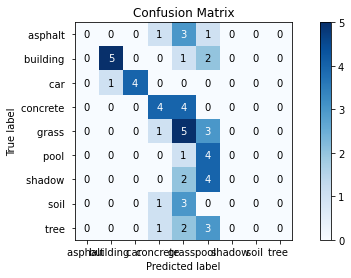

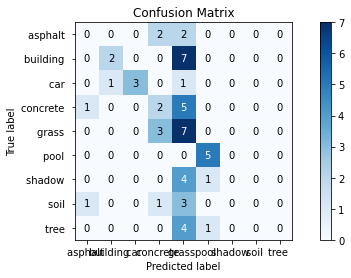

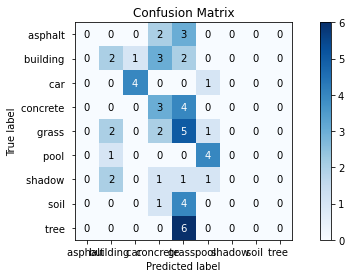

In [54]:
for i in range(0,3):
    fig, ax = plt.subplots(figsize=(10,4))
    plot_confusion_matrix(y_test_list[i], predicted_y_list[i], ax=ax)

svm için c katsayısı değişen hypterparametre'dir. rbf kernel sabit tutulmuş.

In [58]:
x, y = import_data()
skf = StratifiedKFold(n_splits=3)

C_list = [10, 1.0, 0.001]
predicted_y_list = []
y_test_list      = []

best_acc = 0
best_k   = 0
best_c   = 0
k = 0

for train_index, test_index in skf.split(x, y):

    x_train, x_test = x.loc[train_index ], x.loc[test_index]
    y_train, y_test = y.loc[train_index ], y.loc[test_index]


   # classifier = GaussianNB()
    #classifier.fit(x_train, y_train)

    svc = SVC(C = C_list[k] , kernel = "rbf" )  
    svc.fit(x_train, y_train)


    predicted_y = svc.predict(x_test)
    accuracy = accuracy_score(y_test,  predicted_y)*100
    predicted_y_list.append(predicted_y)
    y_test_list.append(y_test)
    
    
    
    if best_acc < accuracy:
        best_acc = accuracy
        best_k   = k
        best_c   = C_list[k]

    print("C = : {} ".format( C_list[k]))
    print('Accuracy : {}  '.format(accuracy) )
    print('recall   : {}  '.format(recall_score(y_test,  predicted_y, average= 'macro')*100))
    print('precision: {}  '.format(precision_score(y_test,  predicted_y, average= 'macro')*100))
    print('F1 Score : {} \n'.format(f1_score(y_test,  predicted_y, average= 'macro')*100) )


    k += 1

C = : 10 
Accuracy : 16.071428571428573  
recall   : 12.716049382716049  
precision: 8.39153439153439  
F1 Score : 9.651416122004358 

C = : 1.0 
Accuracy : 25.0  
recall   : 19.25925925925926  
precision: 14.349206349206348  
F1 Score : 15.542328042328043 

C = : 0.001 
Accuracy : 32.142857142857146  
recall   : 30.873015873015873  
precision: 23.41269841269841  
F1 Score : 25.942634363686995 



C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels 

Verisetinin doğruluğuna ve dengeli olup olmadığının kararının verilmesi için accuracy değerine bakılması yeterli olmamaktadır.
Bu nedenle projemizde diğer metrikler de hesaplanmıştır. Hesaplanan diğer metrikler:

Hassasiyet (Precision): Tüm sınıflardan, doğru olarak ne kadar tahmin edildiğinin bir ölçüsüdür. Mümkün olduğu kadar yüksek olması istenmektedir. 
Pozitif Tahmin Edici Değer olarak da bilinmektedir. 
    
F Puanı (F Score): Bu, gerçek pozitif değerlerin oranının (recall) ve hassasiyetin (precision) harmonik ortalamasıdır. 
Sınıflandırıcının ne kadar iyi performans gösterdiğinin bir ölçüsüdür ve sınıflandırıcıları karşılaştırmakta sıklıkla kullanılmakatdır. 

Recall: Modelin pozitif classların kaçta kaçını yakalandığının anlamlandırılması, gözlemlenmesi ve incelenmesi için kullanılmaktadır.

Bu metriklerin önemi, modeli hangi amaçla geliştirdiğinize göre değişim göstermektedir.

In [56]:
print("Best Accuracy:", best_acc)
print("Best C = ", best_c)
print("K = ",best_k)

Best Accuracy: 32.142857142857146
Best C =  0.001
K =  2


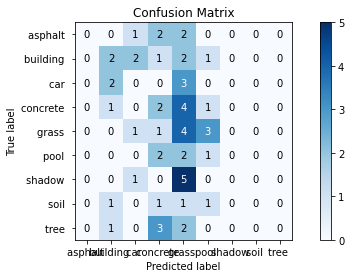

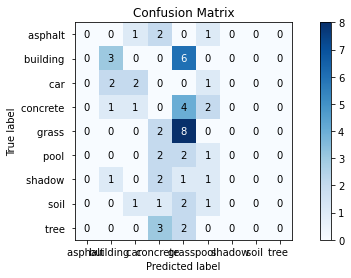

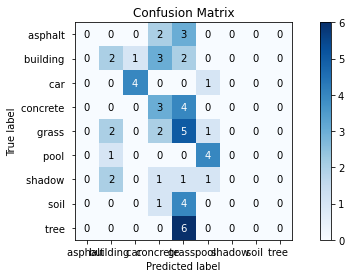

In [57]:
for i in range(0,3):
    fig, ax = plt.subplots(figsize=(10,4))
    plot_confusion_matrix(y_test_list[i], predicted_y_list[i], ax=ax)

# SVM için Karşılaştırma 

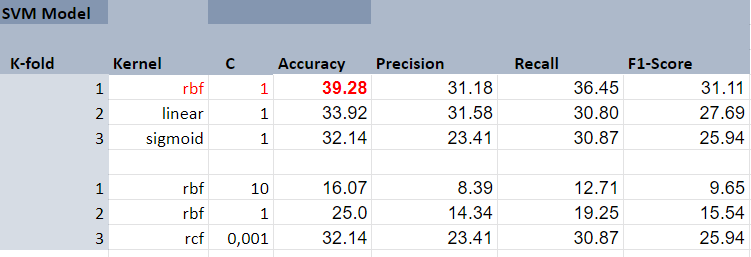

In [60]:
from PIL import Image
tablo1 = Image.open("tablo1.PNG")
tablo1

# SVM with RBF kernel and C = 1

In [126]:
x_train = indexedDataTrain.drop(['class'], axis=1)
y_train = pd.DataFrame(indexedDataTrain['class'].values)

x_test = indexedDataTest.drop(['class'], axis=1)
y_test = pd.DataFrame(indexedDataTest['class'].values)

label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(y_train)
Y_test = label_encoder.fit_transform(y_test)

sc=StandardScaler()
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)


svc = SVC(C = 1 , kernel = "rbf" )  
svc.fit(X_train, Y_train)
predicted_y = svc.predict(X_test)



C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [127]:
accuracy = accuracy_score(Y_test,  predicted_y)*100
print('Accuracy : {}  '.format(accuracy) )
print('recall   : {}  '.format(recall_score(Y_test,  predicted_y, average= 'macro')*100))
print('precision: {}  '.format(precision_score(Y_test,  predicted_y, average= 'macro')*100))
print('F1 Score : {} \n'.format(f1_score(Y_test,  predicted_y, average= 'macro')*100) )

Accuracy : 75.93688362919131  
recall   : 74.73498064892186  
precision: 73.09477596789661  
F1 Score : 73.09212089347358 



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

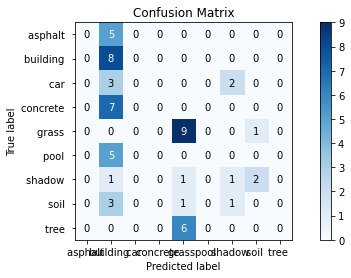

In [128]:
fig, ax = plt.subplots(figsize=(10,4))
plot_confusion_matrix(y_test_list[i], predicted_y_list[i], ax=ax)

Sonuç:
K-Fold çapraz doğrulama sonucunda uygun parameterlerin seçilmesi ve normalizasyon uygulanılarak modelin başarım oranı %30'lardan, %70'lere kadar çıkmıştır.    

# Bayes

 Gaussian Navie Bayes ile

ilk olarak var_smoothing parametresi incelenecktir. var_smoothing = [1e-09, 0.02, 2e-09] değerleri ile.

In [93]:
x, y = import_data()
skf = StratifiedKFold(n_splits=3)

predicted_y_list = []
y_test_list      = []

best_acc = 0
best_k   = 0
var_list = [1e-09, 0.02, 2e-09]
k = 0

for train_index, test_index in skf.split(x, y):

    x_train, x_test = x.loc[train_index ], x.loc[test_index]
    y_train, y_test = y.loc[train_index ], y.loc[test_index]


    GNB = GaussianNB(priors=None, var_smoothing= var_list[k])  
    GNB.fit(x_train, y_train)

    predicted_y = GNB.predict(x_test)
    accuracy = accuracy_score(y_test,  predicted_y)*100
    predicted_y_list.append(predicted_y)
    y_test_list.append(y_test)
    
    
    
    if best_acc < accuracy:
        best_acc = accuracy
        best_k   = k
        best_var = var_list[k]
        

    print("var_smoothing = {}  ".format(var_list[k]))
    print('Accuracy : {}  '.format(accuracy) )
    print('recall   : {}  '.format(recall_score(y_test,  predicted_y, average= 'macro')*100))
    print('precision: {}  '.format(precision_score(y_test,  predicted_y, average= 'macro')*100))
    print('F1 Score : {} \n'.format(f1_score(y_test,  predicted_y, average= 'macro')*100) )


    k += 1

var_smoothing = 1e-09  
Accuracy : 83.92857142857143  
recall   : 83.67283950617285  
precision: 86.34359467692802  
F1 Score : 83.97340476287843 

var_smoothing = 0.02  
Accuracy : 41.07142857142857  
recall   : 42.71604938271605  
precision: 41.29707438530967  
F1 Score : 37.5318508651842 

var_smoothing = 2e-09  
Accuracy : 73.21428571428571  
recall   : 72.77777777777779  
precision: 80.37037037037035  
F1 Score : 71.21663586575868 



C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [94]:
print("Best parameter:", best_var)
print("Best kernel:", best_kernel)
print("K = ",best_k)

Best parameter: 1e-09
Best kernel: rbf
K =  0


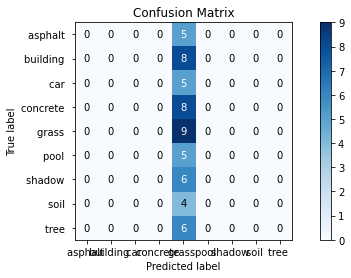

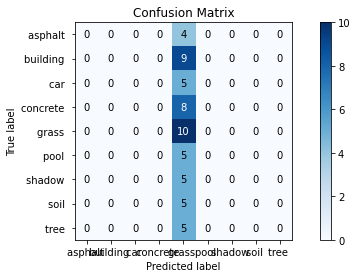

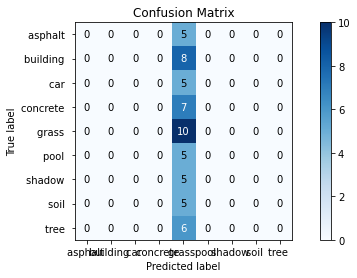

In [39]:
for i in range(0,3):
    fig, ax = plt.subplots(figsize=(10,4))
    plot_confusion_matrix(y_test_list[i], predicted_y_list[i], ax=ax)

farklı bayes modeli ile alpha parametresi incelenecktir

In [115]:
x, y = import_data()
skf = StratifiedKFold(n_splits=3)

predicted_y_list = []
y_test_list      = []

best_acc = 0
best_k   = 0
alpha_list = [10, 1, 0.1]
k = 0

for train_index, test_index in skf.split(x, y):

    x_train, x_test = x.loc[train_index ], x.loc[test_index]
    y_train, y_test = y.loc[train_index ], y.loc[test_index]


    CNB = BernoulliNB(alpha= alpha_list[k])  
    CNB.fit(x_train, y_train)

    predicted_y = CNB.predict(x_test)
    
    accuracy = accuracy_score(y_test,  predicted_y)*100
    predicted_y_list.append(predicted_y)
    y_test_list.append(y_test)
    
    
    
    if best_acc < accuracy:
        best_acc = accuracy
        best_k   = k
        best_alpha = alpha_list[k]
        

    print("alpha = {}  ".format(alpha_list[k]))
    print('Accuracy : {}  '.format(accuracy) )
    print('recall   : {}  '.format(recall_score(y_test,  predicted_y, average= 'macro')*100))
    print('precision: {}  '.format(precision_score(y_test,  predicted_y, average= 'macro')*100))
    print('F1 Score : {} \n'.format(f1_score(y_test,  predicted_y, average= 'macro')*100) )


    k += 1

alpha = 10  
Accuracy : 30.357142857142854  
recall   : 22.22222222222222  
precision: 7.159833630421867  
F1 Score : 10.684417136030039 

alpha = 1  
Accuracy : 33.92857142857143  
recall   : 22.22222222222222  
precision: 7.991681521093286  
F1 Score : 11.595607235142118 

alpha = 0.1  
Accuracy : 32.142857142857146  
recall   : 23.333333333333332  
precision: 11.437908496732025  
F1 Score : 14.320987654320987 



C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels 

In [117]:
print("Best alpha:", best_alpha)
print("Best kernel:", best_kernel)
print("K = ",best_k)

Best alpha: 1
Best kernel: rbf
K =  1


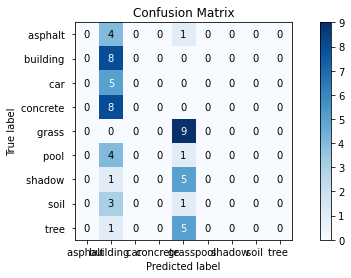

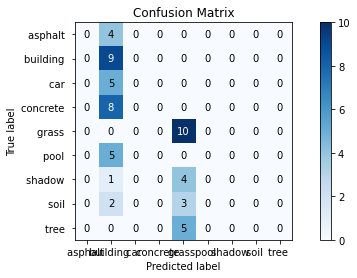

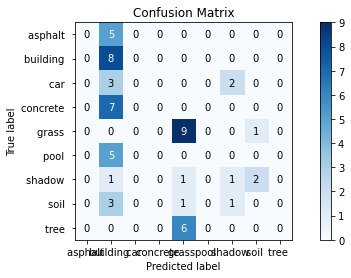

In [118]:
for i in range(0,3):
    fig, ax = plt.subplots(figsize=(10,4))
    plot_confusion_matrix(y_test_list[i], predicted_y_list[i], ax=ax)

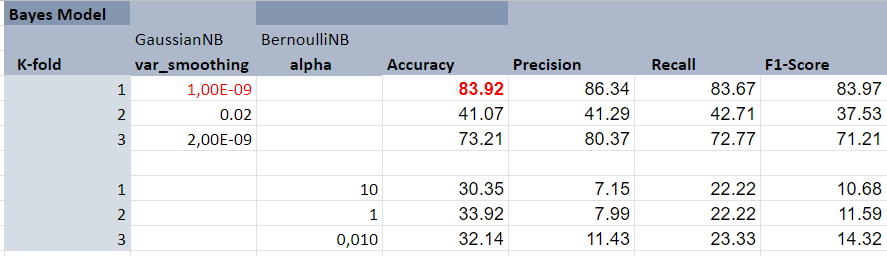

In [119]:
from PIL import Image
tablo1 = Image.open("tablo2.PNG")
tablo1

K-fold çapraz doğrulma sonucunda  Gaussian Navie Bayes modeli ile var_smoothing =1e-09 olacak şekilde kullanımıa karar verilmiştir.
Bu aşama Test aşaması için test dataseti kullanılcak ve normalizasyon uygulanacaktir.

In [129]:
x_train = indexedDataTrain.drop(['class'], axis=1)
y_train = pd.DataFrame(indexedDataTrain['class'].values)

x_test = indexedDataTest.drop(['class'], axis=1)
y_test = pd.DataFrame(indexedDataTest['class'].values)

label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(y_train)
Y_test = label_encoder.fit_transform(y_test)

sc=StandardScaler()
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)


GNB = GaussianNB(priors=None, var_smoothing= 1e-09)  
GNB.fit(X_train, Y_train)
predicted_y = GNB.predict(X_test)


C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [130]:
accuracy = accuracy_score(Y_test,  predicted_y)*100
print('Accuracy : {}  '.format(accuracy) )
print('recall   : {}  '.format(recall_score(Y_test,  predicted_y, average= 'macro')*100))
print('precision: {}  '.format(precision_score(Y_test,  predicted_y, average= 'macro')*100))
print('F1 Score : {} \n'.format(f1_score(Y_test,  predicted_y, average= 'macro')*100) )

Accuracy : 79.09270216962526  
recall   : 77.9191306172057  
precision: 77.99682730624419  
F1 Score : 77.39553714636419 



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

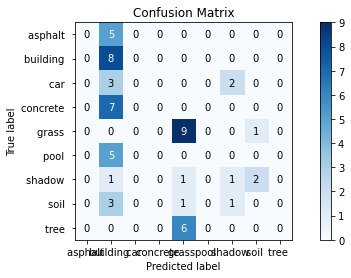

In [131]:
fig, ax = plt.subplots(figsize=(10,4))
plot_confusion_matrix(y_test_list[i], predicted_y_list[i], ax=ax)

# SVM ile Bayes Karşılaştırma

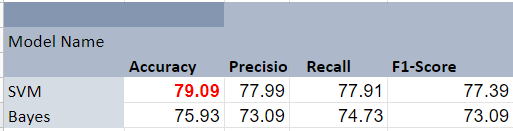

In [132]:
tablo3 = Image.open("tablo3.PNG")
tablo3